<a href="https://colab.research.google.com/github/Vedric/Pokemon-EDA-/blob/main/Pokemon_Analyse_exploratoire%2C_descriptive_et_inf%C3%A9rentielle_de_donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center> POKEMON </center></h1>

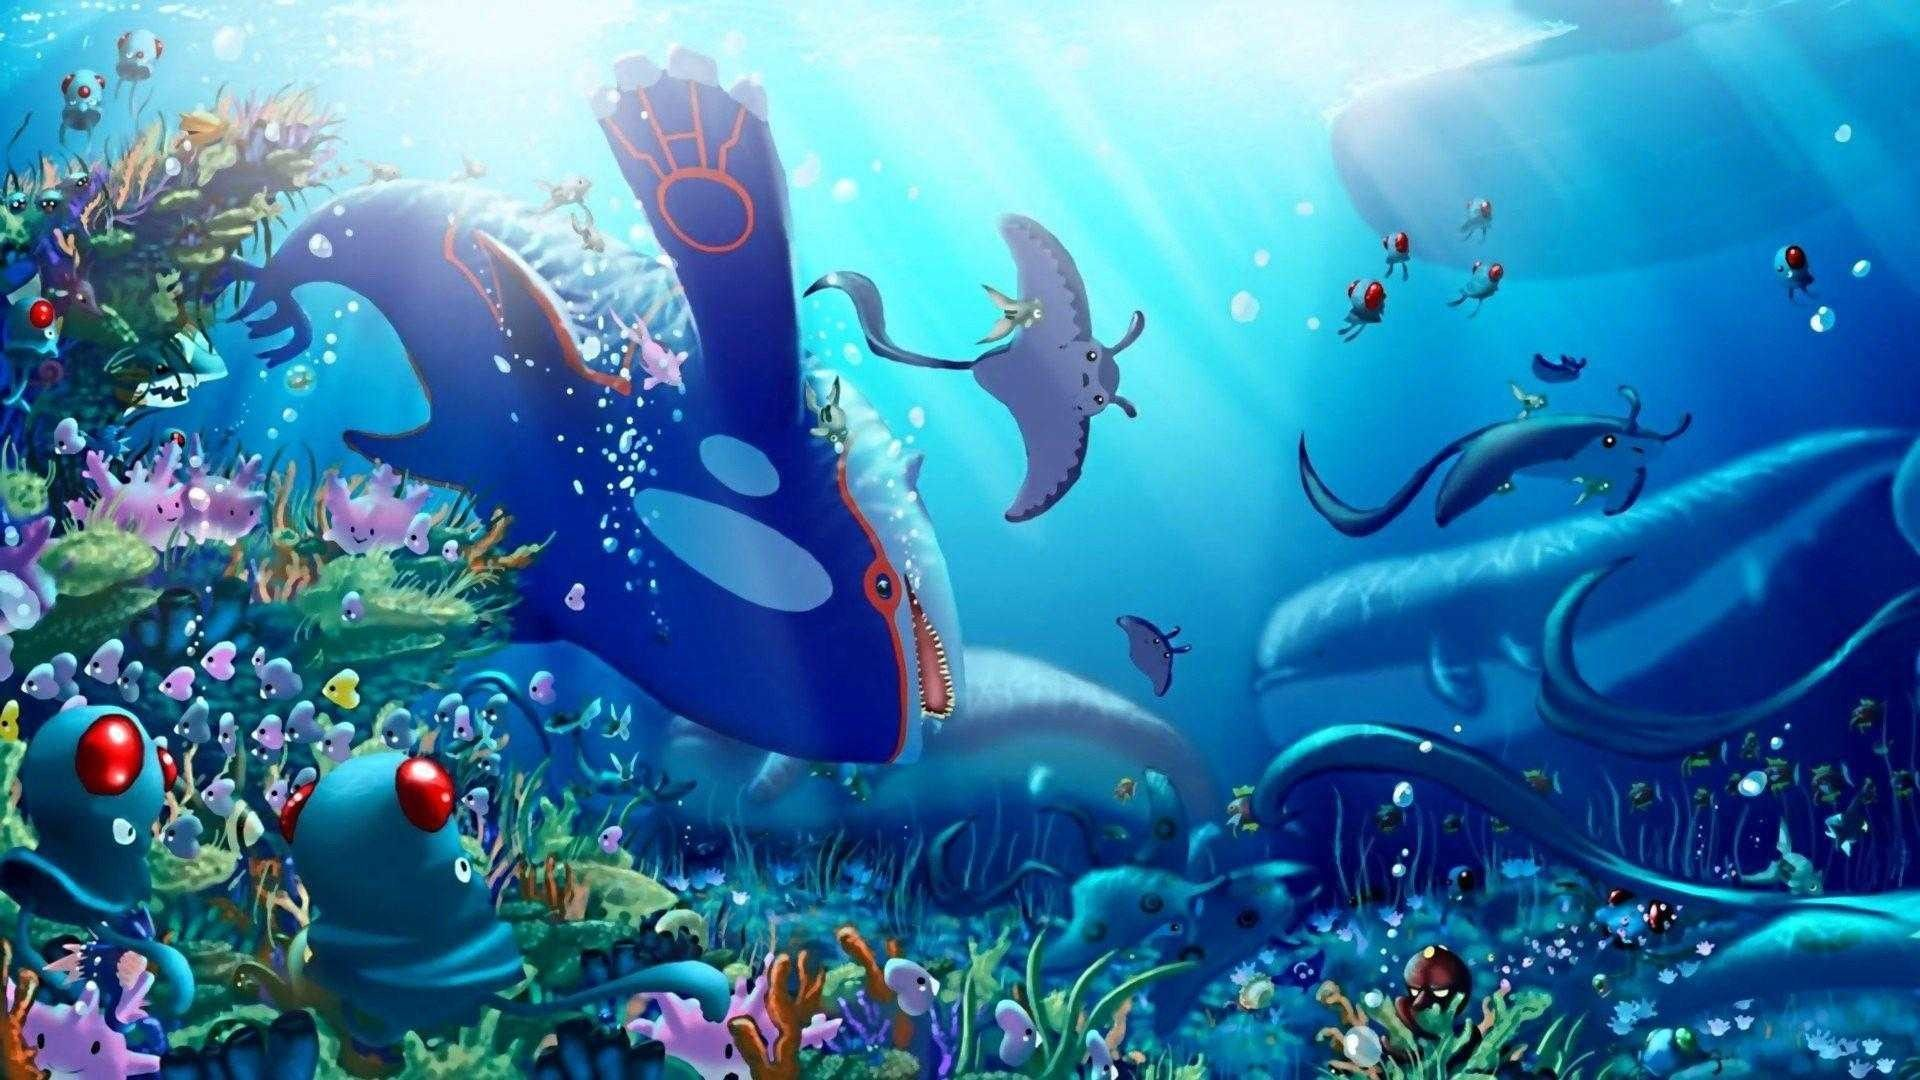



# Introduction

L'ensemble de données comprend 721 Pokémon, y compris leur nombre, nom, premier et deuxième types et données de base : HP, attaque, défense, attaque spéciale, défense spéciale et vitesse. Il est très utile pour enseigner les statistiques aux enfants. Pour certains types, vous pouvez également donner une introduction geek à l'apprentissage automatique.

Ce sont les attributs primitifs utilisés pour calculer les dégâts d'attaque dans le jeu. Cet ensemble de données est utilisé pour les jeux Pokemon (pas pour les cartes Pokemon ou Pokemon Go).

Le différentes variables de ce jeu de données sont les suivantes : 
- ID pour chaque pokemon
- Name : Nom de chaque pokémon
- Type 1 : Chaque pokémon a un type, qui détermine la faiblesse/résistance aux attaques.
- Type 2 : Certains pokemon sont de type double et ont 2 types.
- Total : somme de toutes les statistiques qui viennent après, un guide général de la force d'un pokémon.
- HP : les points de vie, ou santé, définissent la quantité de dégâts qu'un pokémon peut supporter avant de s'évanouir.
- Attaque : le modificateur de base pour les attaques normales (ex. : Griffe, Coup de poing).
- Défense : la résistance de base aux dommages contre les attaques normales
- SP Atk : attaque spéciale, le modificateur de base pour les attaques spéciales (ex : souffle de feu, rayon de bulles)
- SP Def : résistance aux dégâts contre les attaques spéciales.
- Vitesse : détermine quel pokémon attaque en premier à chaque tour.

## 1. Importation des librairies

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon (2).csv
Saving Box_plot_pokemon.png to Box_plot_pokemon.png
Saving pokemon.jpeg to pokemon (1).jpeg


## 2. Lectures du Dataset

In [47]:
df = pd.read_csv('Pokemon.csv')
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [48]:
df.tail(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [49]:
df.shape

(800, 13)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [51]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Le dataset ne présente aucune valeur manque, 386 signifie qu'il y a des Pokémons qui ne présentent qu'un seule type.

In [52]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [53]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# 3. Analyse exploratoire du dataset

### Classement 

Dans un premier nous allons afficher :
- Les 5 Pokémons plus forts
- Les 5 Pokémons plus faibles
- Les 5 Pokémons plus rapides
- Les 5 Pokémons avec la meilleur attaque

NB : La variable 'Total' nous donne la puissance d'un Pokémon en faisant la somme de son Attaque , sa Défense etc...

In [54]:
df[['Name', 'Total', 'HP', 'Generation']].sort_values(by = 'Total', ascending = False).head(5)

,Name,Total,HP,Generation
426,RayquazaMega Rayquaza,780,105,3
164,MewtwoMega Mewtwo Y,780,106,1
163,MewtwoMega Mewtwo X,780,106,1
422,KyogrePrimal Kyogre,770,100,3
424,GroudonPrimal Groudon,770,100,3


Nous avons les 5 Pokémons les plus forts.

In [55]:
df[['Name', 'Total', 'HP', 'Generation']].sort_values(by = 'Total', ascending = True).head(5)

,Name,Total,HP,Generation
206,Sunkern,180,30,2
322,Azurill,190,50,3
446,Kricketot,194,37,4
288,Wurmple,195,45,3
16,Weedle,195,40,1


Nous avons les 5 Pokémons les plus faibles.

In [56]:
df[['Name', 'Speed', 'HP', 'Generation']].sort_values(by = 'Speed', ascending = False).head(5)

,Name,Speed,HP,Generation
431,DeoxysSpeed Forme,180,50,3
315,Ninjask,160,61,3
428,DeoxysNormal Forme,150,50,3
154,AerodactylMega Aerodactyl,150,80,1
71,AlakazamMega Alakazam,150,55,1


Nous avons les 5 Pokémons les plus rapides.

In [57]:
df[['Name', 'Speed', 'Attack', 'Generation']].sort_values(by = 'Attack', ascending = False).head(5)

,Name,Speed,Attack,Generation
163,MewtwoMega Mewtwo X,130,190,1
232,HeracrossMega Heracross,75,185,2
424,GroudonPrimal Groudon,90,180,3
426,RayquazaMega Rayquaza,115,180,3
429,DeoxysAttack Forme,150,180,3


Nous avons les 5 Pokémons l'attaque la plus puissante.

### Corrélations

Nous allons voir s'il existe des liens de corrélations forts ou moins forts entre : 

- L'attaque VS la vitesse
- L'attaque VS la défense

In [58]:
fig = px.scatter(df, x = "Attack", y = "Speed", color="Speed", size='Speed',trendline = 'ols',
                 title = "Corrélation entre l'attaque et la vitesse")
fig.show()

In [59]:
fig = px.scatter(df, x = "Attack", y = "Defense", color="Speed", size='Speed',trendline = 'ols',
                title = "Corrélation entre l'attaque et la défénse")
fig.show()

### Analyses des différents types 

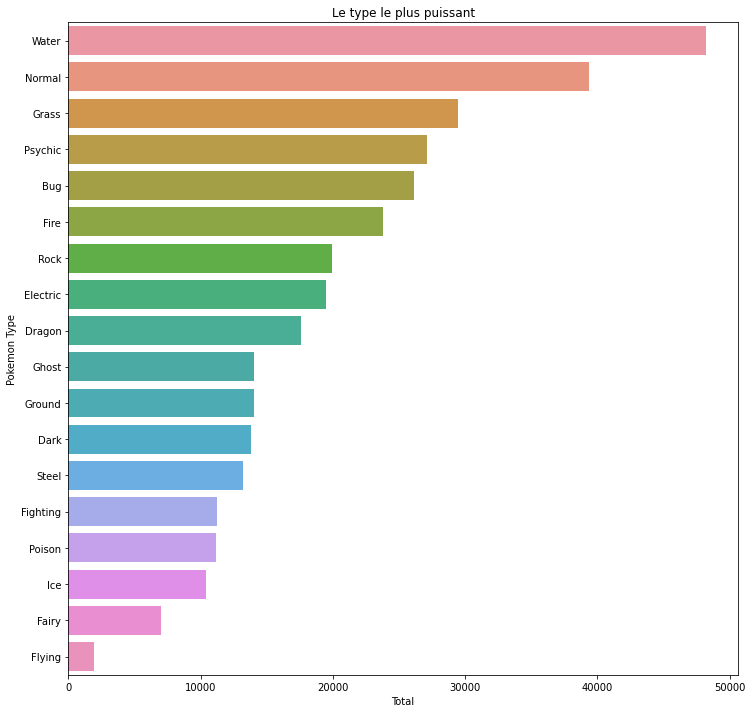

In [60]:
plt.figure(figsize=(12,12))
x_types = df.groupby("Type 1").Total.sum().sort_values(ascending= False)
fig= sns.barplot(x_types.values,x_types.index)
fig.set_xlabel("Total")
fig.set_ylabel("Pokemon Type")
plt.title('Le type le plus puissant')
plt.show()

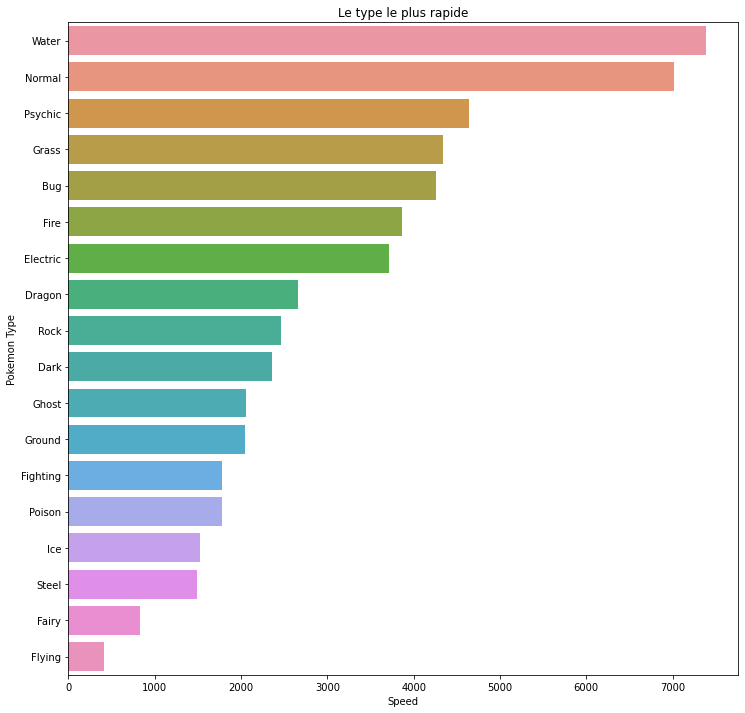

In [61]:
plt.figure(figsize=(12,12))
x_types = df.groupby("Type 1").Speed.sum().sort_values(ascending= False)
fig= sns.barplot(x_types.values,x_types.index)
fig.set_xlabel("Speed")
fig.set_ylabel("Pokemon Type")
plt.title('Le type le plus rapide')
plt.show()

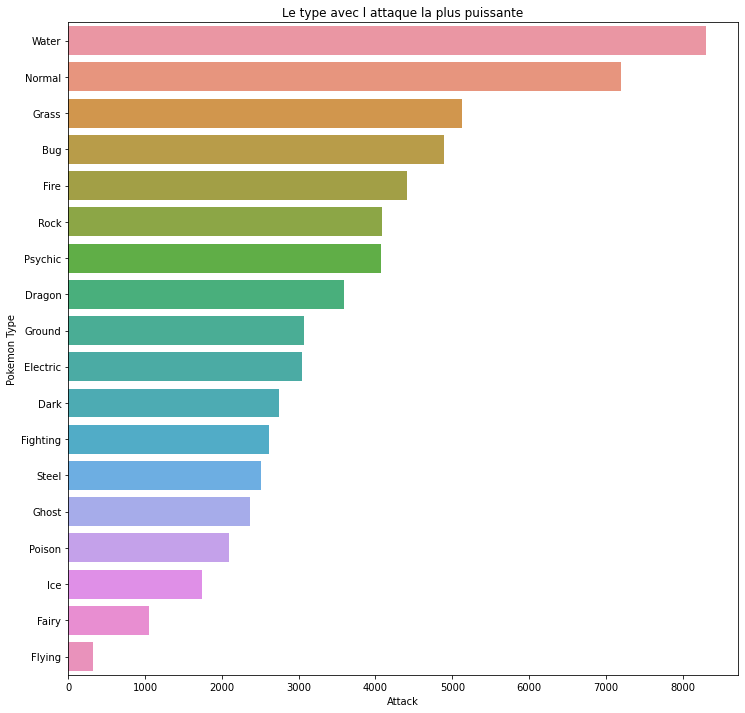

In [62]:
plt.figure(figsize=(12,12))
x_types = df.groupby("Type 1").Attack.sum().sort_values(ascending= False)
fig= sns.barplot(x_types.values,x_types.index)
fig.set_xlabel("Attack")
fig.set_ylabel("Pokemon Type")
plt.title('Le type avec l attaque la plus puissante')
plt.show()

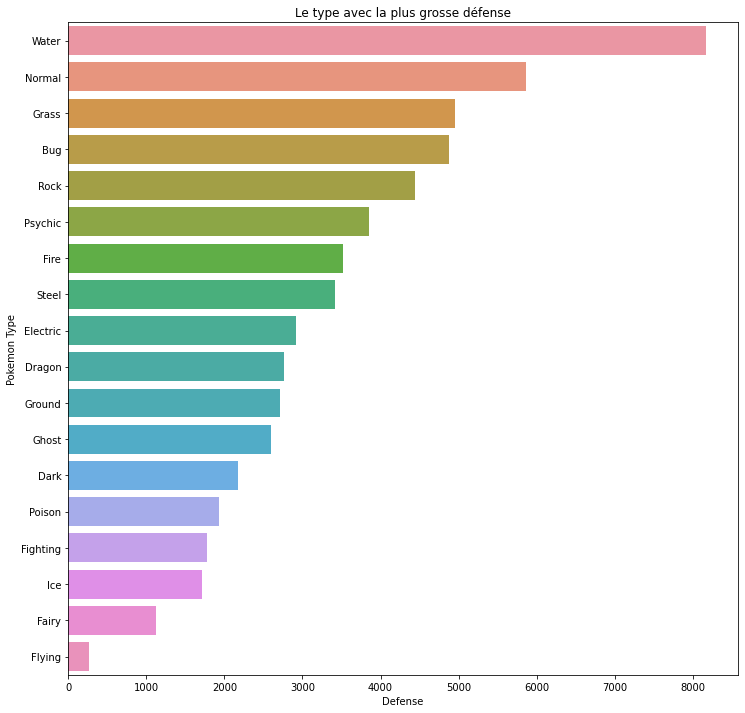

In [63]:
plt.figure(figsize=(12,12))
x_types = df.groupby("Type 1").Defense.sum().sort_values(ascending= False)
fig= sns.barplot(x_types.values,x_types.index)
fig.set_xlabel("Defense")
fig.set_ylabel("Pokemon Type")
plt.title('Le type avec la plus grosse défense')
plt.show()

### Comparaison des Pokémons légendaires face aux Pokémons oridinaires

Dans un premier temps , mettons toutes les caractéristiques des Pokémons dans un tableau qu'on assignera à une varible 'statistiques'.

In [64]:
statistiques = ["Attack",
                "Defense",
                "Total",
                "Sp. Atk",
                "Sp. Def",
                "Speed",
                "HP"]

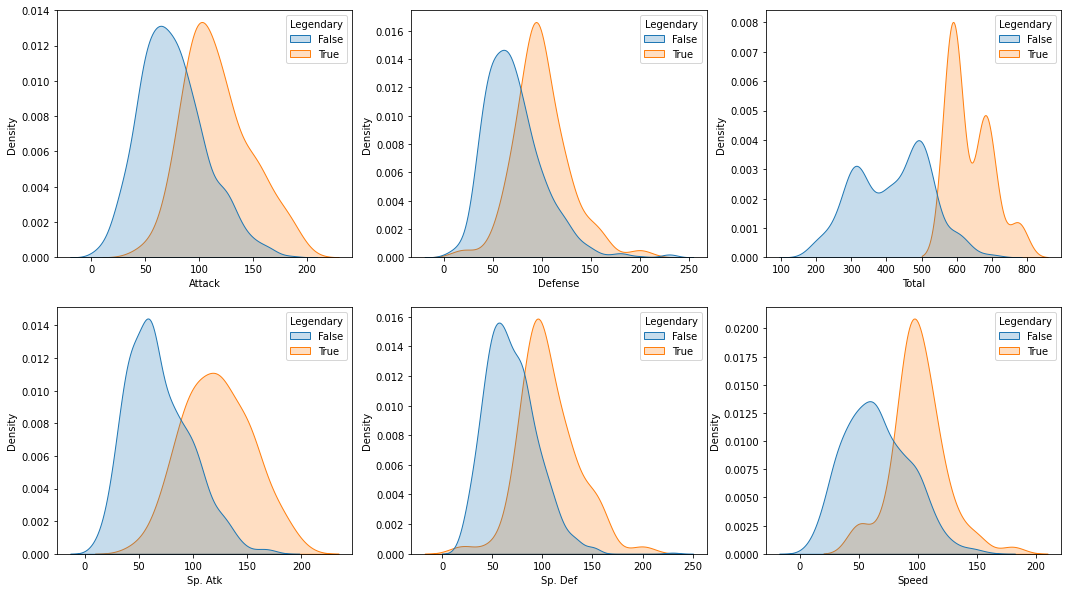

In [65]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.kdeplot(data=df, x=statistiques[0], hue="Legendary", fill=True, common_norm=False, ax=axs[0, 0])
sns.kdeplot(data=df, x=statistiques[1], hue="Legendary", fill=True, common_norm=False, ax=axs[0, 1])
sns.kdeplot(data=df, x=statistiques[2], hue="Legendary", fill=True, common_norm=False, ax=axs[0, 2])
sns.kdeplot(data=df, x=statistiques[3], hue="Legendary", fill=True, common_norm=False, ax=axs[1, 0])
sns.kdeplot(data=df, x=statistiques[4], hue="Legendary", fill=True, common_norm=False, ax=axs[1, 1])
sns.kdeplot(data=df, x=statistiques[5], hue="Legendary", fill=True, common_norm=False, ax=axs[1, 2]);

### Vue d'ensemble 

In [69]:
fig = px.box(df, x = "Generation", y = "Total", color = "Generation",
            title = 'Puissance de tous les Pokémons de chaque génération')
fig.show();

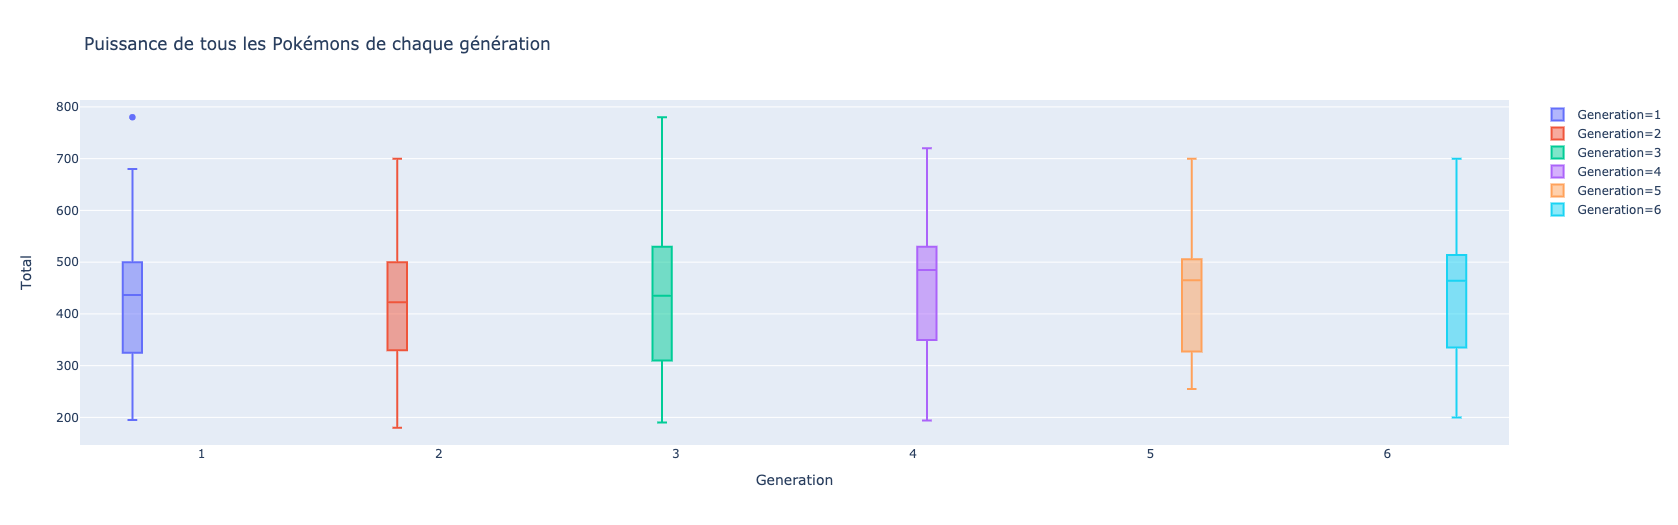